# Data Import

In [1]:
# Importing required libraries/modules..
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading/Loading the data from csv.
titanic = pd.read_csv("train.csv")

# Exploring The Imported data

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Initial Observations

###### (1). This data set contains 891 Rows & 12 Columns.
###### (2). The 'Name' column contains the full name including the Salutation. The Last Name is placed first.
###### (3). There are few null values in 'Age' column &  type of this column is 'float'.
###### (4). The 'Survived' column stores one of the two values (0 or 1). The type of this column is 'integer'.

# Questions:
###### (1). Count of passengers Sex wise.
###### (2). Sex wise Count of died passengers.
###### (3). Age wise count of died passengers for  Male.
###### (4). Identification of any pattern which can help in prediction.


# Data Cleaning & Wrangling.

In [4]:
# During the exploration phase it was identified that 'Name' column stores,
# the full name including salutation. The last name is placed at first place.
# To make further analysis easier , the below steps will convert the name column into two columns.
# A new column 'Salutation' will be added which will store the values of salutation, e.g.('Mr','Mrs'..etc).
# This will make filtering more easier. The resulting 'Name' column will store the full name . 
# First Name will be placed at first place.

In [5]:
# Taking out the 'name' column . It will return a series,
# this will be used to format the names,
# of passengers.
name_series = titanic["Name"]

In [6]:
# Defining few functions below which will help in extracting the 'Salutation' from existing 'Name' and to convert,
# the 'Name' (last Name + First Name) to 'Name'(First Name + Last Name).

In [7]:
# Below function is to extract the 'Salutation' value from existing 'Name'. 
def sal_test(data):
    i = 0
    salutationp = []
    while i <= len(data) - 1:
        salutationp.append(data[i].split(",")[1].split(".")[0])
        i = i + 1
    return salutationp

# Below function will convert the (Last Name + First Name) to (First Name + Last Name)
def name_update(data):
    i = 0
    full_name = []
    while i <= len(data) - 1:
        first_name = data[i].split(",")[1].split(".")[1]
        last_name = data[i].split(",")[0]
        full_name.append(first_name + ' ' + last_name)
        i = i + 1
    return full_name 

# Below function will help in updating the existing data frame.
def df_cr(dfr):
    new_df = dfr.copy(deep = True)
    new_df["Name"] = name_update(name_series)
    return new_df

In [8]:
# Inserting a new column 'Salutation' with values extracted from name.
titanic.insert(3, column="Salutation", value=sal_test(name_series))

In [9]:
# Calling up function to update the 'Name' column to store values as (First Name + Last Name). 
# titanic_clean is new DataFrame with the modified/added columns
titanic_clean = df_cr(titanic)

In [10]:
# Below command will show us the modification performed.
titanic_clean.head(6)

,PassengerId,Survived,Pclass,Salutation,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,Owen Harris Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,Laina Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,William Henry Allen,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Mr,James Moran,male,NaN,0,0,330877,8.4583,NaN,Q


##### Handling 'NA' ..

In [12]:
# It was observed during data exploration phase that 'Age' column has 'NA' values.
# We are going to replace the 'NA' with the mean of 'Age' .  
# But as it is visible after adding Salutation' column there are mainly three categories of,
# passengers(Kids, Adult Males & Adult Females) 
# We will try to get the mean of age for each category and then will update the 'NA' values of corresponding category with
# the mean.
#  The below function will help us to acheive the output.

In [13]:
# Below function takes two arguments. 1.) DF to be updated & 2.) Salutation , for which the 'NA' values in
# 'Age' need to be replaced by mean.
def df_update_f_age(dfr, salu):
    new_df = dfr.copy(deep = True)
    # Common Conditions...
    chk_null = titanic_clean.Age.isnull() # cond1
    chk_not_null = titanic_clean.Age.notnull() # cond5
    # Conditions for male..
    male_cond = titanic_clean.Sex == 'male' # cond2
    ad_male_cond = titanic_clean.Salutation != " Master" # cond3
    ch_male_cond = titanic_clean.Salutation == " Master" # cond4
    # Conditions for females
    female_cond = titanic_clean.Sex == "female" # test_cond
    no_miss_cond = titanic_clean.Salutation != " Miss" # test_cond1
    miss_cond = titanic_clean.Salutation == " Miss" # test_cond2
    # Calculating mean of age for male.(Adult & Child)
    adult_male_mage = round(new_df[chk_not_null & male_cond & ad_male_cond].Age.mean(),2)
    child_male_mage = round(new_df[chk_not_null & male_cond & ch_male_cond].Age.mean(),2)
    # Calculating mean of age for female(Miss, Mrs & for other salutation)
    mean_of_miss = round(new_df[miss_cond & chk_not_null].Age.mean(),2)
    mean_of_mrs = round(new_df[no_miss_cond & chk_not_null].Age.mean(),2)
    # Putting up different conditions .    
    if salu == " Miss":
        new_df = new_df[miss_cond & chk_null]
        new_df.Age.fillna(value=mean_of_miss,inplace=True)
    elif salu == " Mrs": 
        new_df = new_df[(female_cond & no_miss_cond & chk_null)]
        new_df.Age.fillna(value=mean_of_mrs,inplace=True)
    elif salu == " Mr":
        new_df = new_df[(male_cond & ad_male_cond & chk_null)]
        new_df.Age.fillna(value=adult_male_mage,inplace=True)
    elif salu == " Master":
        new_df = new_df[(male_cond & ch_male_cond & chk_null)]
        new_df.Age.fillna(value=child_male_mage,inplace=True)
    else:
        print("Not Possible")
    # Returning a scalar object to be used for  updating  the Age column of main dataframe.
    return new_df["Age"]

In [14]:
titanic_clean.Age.update(df_update_f_age(titanic_clean," Miss"))
titanic_clean.Age.update(df_update_f_age(titanic_clean," Mrs"))
titanic_clean.Age.update(df_update_f_age(titanic_clean," Master"))
titanic_clean.Age.update(df_update_f_age(titanic_clean," Mr"))

In [15]:
# The update can be verified by below command.
titanic_clean.head(50)

,PassengerId,Survived,Pclass,Salutation,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,Owen Harris Braund,male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,John Bradley (Florence Briggs Thayer) Cumings,female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,Laina Heikkinen,female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,William Henry Allen,male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,Mr,James Moran,male,32.98,0,0,330877,8.4583,NaN,Q
6,7,0,1,Mr,Timothy J McCarthy,male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,Master,Gosta Leonard Palsson,male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,Mrs,Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,Mrs,Nicholas (Adele Achem) Nasser,female,14.00,1,0,237736,30.0708,NaN,C


In [16]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Salutation     891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


# Answers:

###### (1). Count of passengers Sex wise.

In [17]:
temp_titanic_clean = titanic_clean.copy(deep=True)

In [18]:
# Converting the Survived column from int to category to make analysis easier.
temp_titanic_clean["Survived"] = titanic_clean["Survived"].astype('category')

In [19]:
titanic_clean = temp_titanic_clean

In [27]:
plot_titanic = titanic_clean[["Sex","Survived"]]

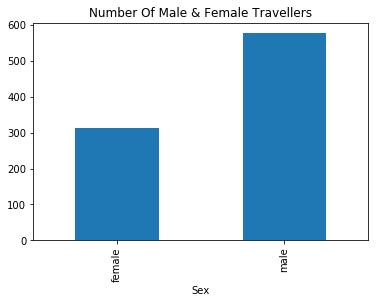

In [28]:
# Plotting the count of passengers gender wise..
plot_titanic.groupby("Sex").count().plot(kind='bar',title='Number Of Male & Female Travellers',legend=False)

###### (2). Sex wise Count of died passengers

In [29]:
# Creating condition for extracting  records of died passengers only
dead_count = plot_titanic.Survived == 0

In [30]:
# Subseting the DF created in previous step.
plot_titanic1 = plot_titanic[dead_count]

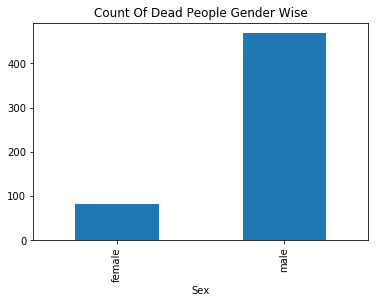

In [33]:
plot_titanic1.groupby("Sex").count().plot(kind='bar',title='Count Of Dead People Gender Wise',legend=False)

###### (3). Age wise count of died passengers for  Male.

In [34]:
# Condition to extract male passengers.
male_passengers = titanic_clean.Sex == "male"

In [35]:
dead_count_male = titanic_clean.Survived == 0

In [36]:
male_dead_passengers = titanic_clean[dead_count_male & male_passengers]

In [37]:
male_dead_passengers_age_wise = male_dead_passengers[["Age","Survived"]]

In [38]:
male_dead_passengers_age_wise.head(10)

,Age,Survived
0,22.00,0
4,35.00,0
5,32.98,0
6,54.00,0
7,2.00,0
12,20.00,0
13,39.00,0
16,2.00,0
20,35.00,0
26,32.98,0


In [39]:
# The 'Age' column is storing the ages in float . Below lines of code will convert it is integer also we will be converting
# each age record in to group.
# Taking out the 'Age' so that these can be put into 'Group'.
male_dead_passengers_age_wise_ages = male_dead_passengers_age_wise[["Age"]]

In [40]:
# Adding a new Column 'Group' with default value as blank.
male_dead_passengers_age_wise_ages["Group"] = ""

In [41]:
def convert_to_grp(data):
    ikeys = [data.index]
    final_keys =[]
    print(type(ikeys))
    i = 0
    while i <= len(data) -1:
        #print(ikeys[0][i])
        final_keys.append(ikeys[0][i])           
        i = i + 1
    
    return final_keys

In [42]:
def con_age_grp(data):
    i = 0
    male_dead_passengers_age_wise_ages_Group = []
    while i <= len(data) -1:
        if int(data["Age"][(final_keys[i])]) in range(10):
            male_dead_passengers_age_wise_ages_Group.append("1 - 10")
        elif data["Age"][(final_keys[i])] in range(11 , 21): 
            male_dead_passengers_age_wise_ages_Group.append("11 - 20")
        elif data["Age"][(final_keys[i])] in range(21 , 31):
            male_dead_passengers_age_wise_ages_Group.append("21 - 30")
        elif data["Age"][(final_keys[i])] in range(31 , 41):
            male_dead_passengers_age_wise_ages_Group.append("31 - 40")
        elif data["Age"][(final_keys[i])] in range(41 , 51):
            male_dead_passengers_age_wise_ages_Group.append("41 - 50")
        elif data["Age"][(final_keys[i])] in range(51 , 61):
            male_dead_passengers_age_wise_ages_Group.append("51 - 60")
        elif data["Age"][(final_keys[i])] in range(61 , 71):
            male_dead_passengers_age_wise_ages_Group.append("61 - 70")
        elif data["Age"][(final_keys[i])] in range(71 , 81):
            male_dead_passengers_age_wise_ages_Group.append("71 - 80")
        elif data["Age"][(final_keys[i])] in range(81 , 91):
            male_dead_passengers_age_wise_ages_Group.append("81 - 90")    
        else:
            male_dead_passengers_age_wise_ages_Group.append("Above 90")
            
        i = i + 1
  

        
    return male_dead_passengers_age_wise_ages_Group

In [43]:
final_keys = convert_to_grp(male_dead_passengers_age_wise_ages)

<class 'list'>


In [44]:
male_dead_passengers_age_wise_ages_temp = male_dead_passengers_age_wise_ages.copy(deep=True)
male_dead_passengers_age_wise_ages_temp["Age"] = male_dead_passengers_age_wise_ages_temp["Age"].astype('int')
male_dead_passengers_age_wise_ages = male_dead_passengers_age_wise_ages_temp

In [45]:
male_age_groups = con_age_grp(male_dead_passengers_age_wise_ages)

In [48]:
male_dead_passengers_age_wise_ages_temp = male_dead_passengers_age_wise_ages.copy(deep=True)
male_dead_passengers_age_wise_ages_temp["Group"] = male_age_groups
male_dead_passengers_age_wise_ages = male_dead_passengers_age_wise_ages_temp
male_dead_passengers_age_wise_ages.head(10)

,Age,Group
0,22,21 - 30
4,35,31 - 40
5,32,31 - 40
6,54,51 - 60
7,2,1 - 10
12,20,11 - 20
13,39,31 - 40
16,2,1 - 10
20,35,31 - 40
26,32,31 - 40


In [50]:
male_dead_passengers_age_wise_temp = male_dead_passengers_age_wise.copy(deep=True)
male_dead_passengers_age_wise_temp["Group"] = male_age_groups
male_dead_passengers_age_wise = male_dead_passengers_age_wise_temp
plot_male_dead_passengers_age_wise = male_dead_passengers_age_wise[["Group","Survived"]]

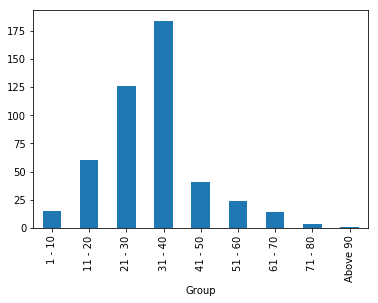

In [52]:
plot_male_dead_passengers_age_wise.groupby("Group").count().plot(kind='bar',legend=False)

###### (4).Identification of any pattern which can help in prediction

##### Based on above analysis we can observe a pattern that if the passenger is Male and if age is in range 31- 40 then he is not likely to survive.

In [ ]:
#############################################